# Exporative Data Report — US YouTube Videos

Trending YouTube videos capture what is going on in the world through a variety
of different categories. YouTube videos are something that almost everyone in 
the United States is familiar with. However, the types of videos and the 
logistics behind the videos that make the trending section are not as 
well known. In this report I will analyze what factors support videos making 
it into YouTube's trending section through summaries, tables, and visual 
representations of our findings from our data set. The data set I will be
using to conduct this analysis was created and organized by 
[Mitchell J.](https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv)
It is important to note that our analysis is only for videos **in the United States** and does 
not contain correlations between the factors we are analyzing and other countries.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [112]:
df_yout = pd.read_csv("./USvideos.csv")

# General Dataset Information
### Column names & number of Entries

In [113]:
df_yout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

As the table above shows, the dataset contains 21 columns and 40,949 rows. This data set is very large.
### Table of Basic Column Statistics

In [114]:
df_yout.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


The table above gives a general description of the dataset. As we can see the average trending video has 2,360,785 views, 74,366 likes, 3,711 dislikes, and 8,446 comments. 
### Bargraph of Years the Dataset Spanned

Text(0, 0.5, 'Number of Views (e10)')

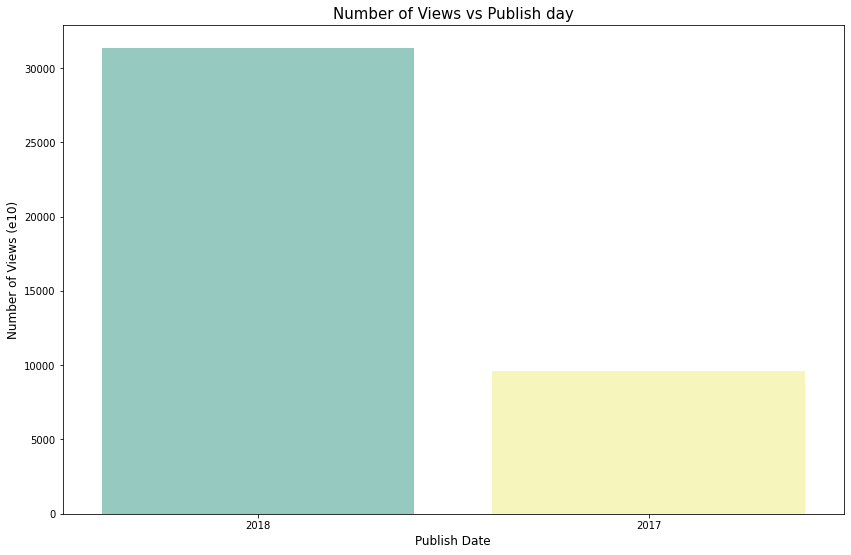

In [115]:
filteredData = df_yout["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})


plt.figure(figsize = (14,9))
plt.subplot()
g2 = sns.barplot(x="year", y="No_of_videos", data=filteredData, palette="Set3")
g2.set_title("Number of Views vs Publish day", fontsize=15)
g2.set_xlabel("Publish Date", fontsize=12)
g2.set_ylabel("Number of Views (e10)", fontsize=12)

Our dataset spans from 2017 - 2018 with more data coming from 2018. As This dataset 
is not very recent it is important to keep in mind that this will most likely effects the results in some way.

# Charts
### Number of Trending Videos by Category

In [116]:
df_yout['category_name'] = np.nan

### Defining Categories based on CSV Values
df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sport'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News and Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'How to and Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yout.loc[(df_yout["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'

Text(0, 0.5, 'Number of Trending Videos')

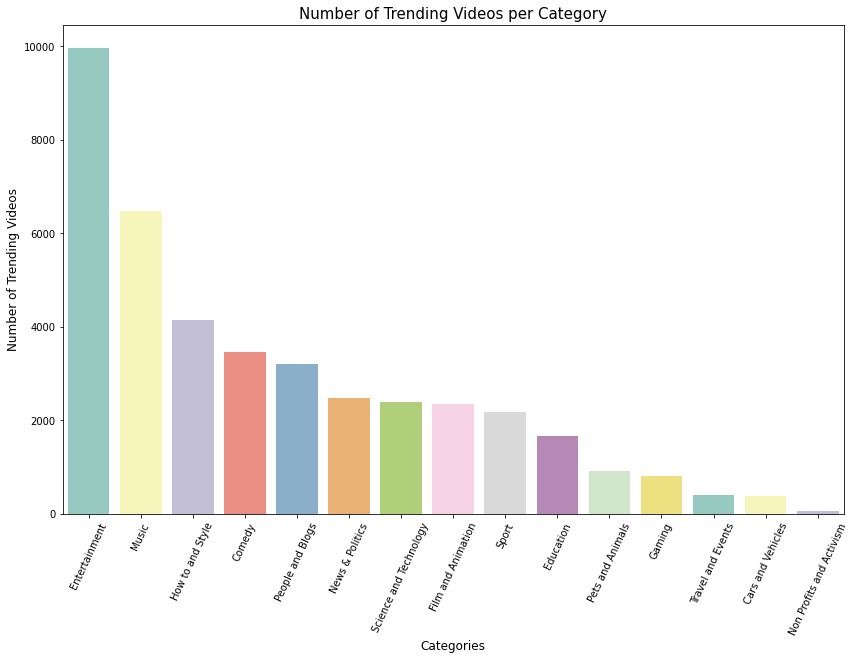

In [117]:
filteredData = df_yout["category_name"].value_counts().to_frame().reset_index()
filteredData.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)

plt.figure(figsize = (14,9))
plt.subplot()
g = sns.barplot(x="category_name", y="No_of_videos", data=filteredData, palette="Set3")
g.set_xticklabels(g.get_xticklabels(),rotation=65)
g.set_title("Number of Trending Videos per Category", fontsize=15)
g.set_xlabel("Categories", fontsize=12)
g.set_ylabel("Number of Trending Videos", fontsize=12)

The Bargraph above show the number of trending videos that came from each category. 
From looking at the graph, it is clear to see that the majority of videos that 
make it into the trending section are **Music, Entertainment, and How to and style**.
Interestingly I found that YouTube has more than 15 unique categories, but the trending 
page groups them into broader categories for their trending data. 

### Number of Trending Videos Posted on Each Day of the Week

Text(0, 0.5, 'Number of Trending Videos')

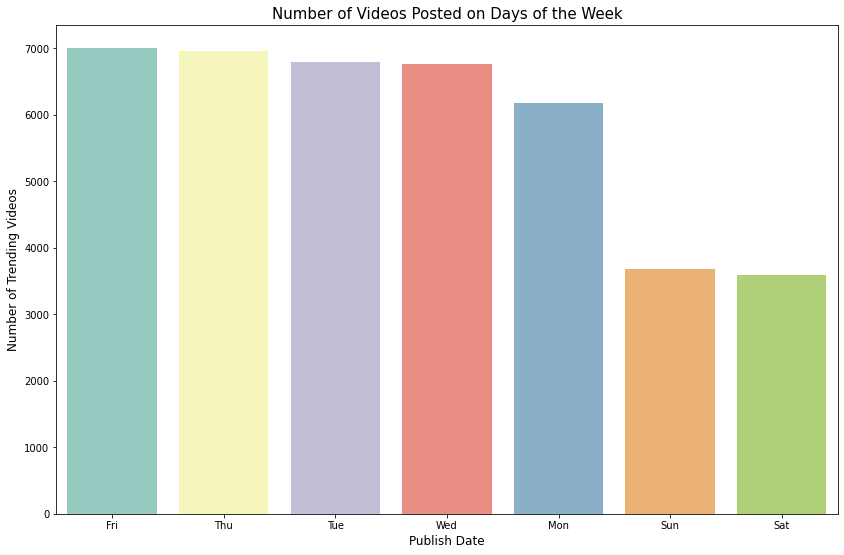

In [118]:
df_yout["publishedDayOfWeek"] = df_yout["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
    
df_yout["publishedHourOfDay"] = df_yout["publish_time"].apply(lambda x: x[11:13])
df_yout.drop(labels='publish_time', axis=1, inplace=True)

filteredData = df_yout["publishedDayOfWeek"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishedDayOfWeek", "publishedDayOfWeek": "No_of_videos"})

plt.figure(figsize = (14,9))
plt.subplot()
g2 = sns.barplot(x="publishedDayOfWeek", y="No_of_videos", data=filteredData, palette="Set3")
g2.set_title("Number of Videos Posted on Days of the Week", fontsize=15)
g2.set_xlabel("Publish Date", fontsize=12)
g2.set_ylabel("Number of Trending Videos", fontsize=12)

In the graph above, I wanted to see if trending videos tended to get published on specific days of the week. While Friday, Thursday, Tuesday, and Monday all seem to be good days to post a trending video, Sunday and Saturday do not preform well. I expected Saturday and Sunday to do well, so let's try to find out why the weekend produces so few trending videos following this next graph. 

### Number of Trending Videos Posted on Each Hour of the Day

Text(0, 0.5, 'Number of Trending Videos')

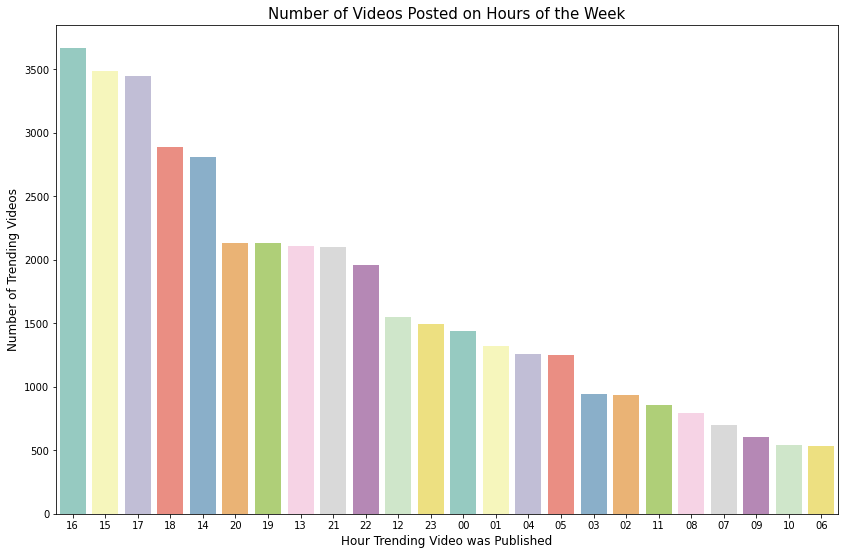

In [119]:
filteredData = df_yout["publishedHourOfDay"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishedHourOfDay", "publishedHourOfDay": "No_of_videos"})

plt.figure(figsize = (14,9))
plt.subplot()
g3 = sns.barplot(x="publishedHourOfDay", y="No_of_videos", data=filteredData, palette="Set3")
g3.set_title("Number of Videos Posted on Hours of the Week", fontsize=15)
g3.set_xlabel("Hour Trending Video was Published", fontsize=12)
g3.set_ylabel("Number of Trending Videos", fontsize=12)

In the graph above, I wanted to see if trending videos tended to get published on specific hours of the day. Videos posted at within an hour of 4:00 PM are more likely to be trending, while videos posted before noon are less likely to be trending. As such, it's likely best to post a video in the evening, if you are trying to make it trend.

### Number of Video Views vs Published Day 

Text(0, 0.5, 'Number of Views (e10)')

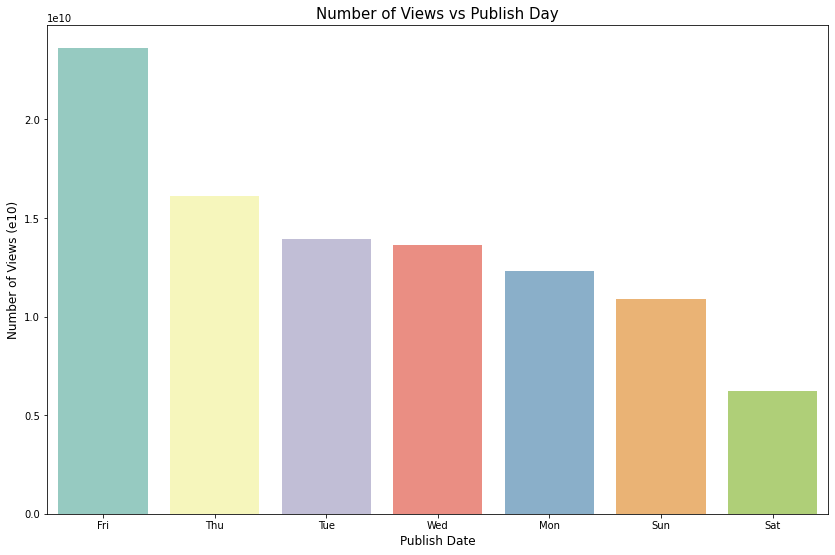

In [120]:

filteredData = df_yout.groupby("publishedDayOfWeek").sum()["views"].to_frame().reset_index().sort_values("views", ascending=False).\
    rename(columns={"index": "publishedDayOfWeek", "publishedDayOfWeek": "publishedDayOfWeek"})

plt.figure(figsize = (14,9))
plt.subplot()
g2 = sns.barplot(x="publishedDayOfWeek", y="views", data=filteredData, palette="Set3")
g2.set_title("Number of Views vs Publish Day", fontsize=15)
g2.set_xlabel("Publish Date", fontsize=12)
g2.set_ylabel("Number of Views (e10)", fontsize=12)

In the graph above, I wanted to see if there is a relationship between average viewership and the posting day of the week. 

This graph clearly shows that trending videos posted on Friday receive nearly double
the average viewership. Additionally, Saturday is a particularly slow day
for Trending YouTube videos. This may mean that popular creators should attempt to
have a video on the trending page every Thursday or Friday because this is when they
would likely receive the highest viewership. As shown in the visualization 
"Number of Videos Posted on Days of the Week", fewer videos were published on Satuday and Sunday
compared to other weekdays. Since Friday videos have so many more views compared to other days
it is likely that trending videos posted on Friday are watched throughout the weekend. 


### Number of Video Views vs Published Hour

Text(0, 0.5, 'Number of Trending Videos')

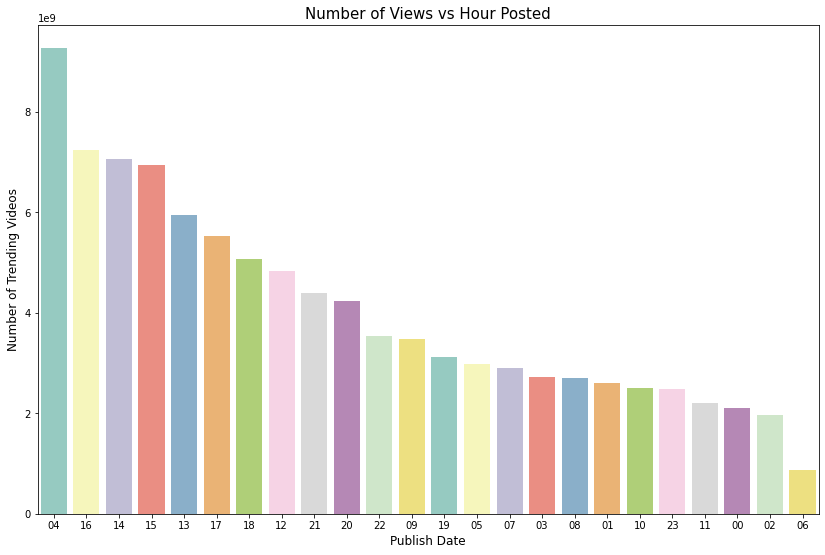

In [121]:
filteredData = df_yout.groupby("publishedHourOfDay").sum()["views"].to_frame().reset_index().sort_values("views", ascending=False).\
    rename(columns={"index": "publishedDayOfWeek", "publishedDayOfWeek": "views"})

plt.figure(figsize = (14,9))
plt.subplot()
g2 = sns.barplot(x="publishedHourOfDay", y="views", data=filteredData, palette="Set3")
g2.set_title("Number of Views vs Hour Posted", fontsize=15)
g2.set_xlabel("Publish Date", fontsize=12)
g2.set_ylabel("Number of Trending Videos", fontsize=12)

In the graph above, I wanted to see if there is a relationship between average viewership and the posting hour of the week. 

This graph shows an odd pattern of posting hours for trending videos. 4:00 AM & 4:00 PM to 6:00 PM seem to be great hours to post a trending video. However, shortly after 4:00 AM at 6:00 AM is the worst times to post a trending video. These odd results likely occur because of how users interact with YouTube videos. For example, videos in the evening likely perform well because users watch them after a work day. 